<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных¶" data-toc-modified-id="Исследовательский-анализ-данных¶-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Исследовательский анализ данных¶</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удалить-знаки-пунктуации-и-копирование-датасета" data-toc-modified-id="Удалить-знаки-пунктуации-и-копирование-датасета-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Удалить знаки пунктуации и копирование датасета</a></span></li><li><span><a href="#Токенизация" data-toc-modified-id="Токенизация-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Токенизация</a></span></li><li><span><a href="#Удаление-стов-слов" data-toc-modified-id="Удаление-стов-слов-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Удаление стов-слов</a></span></li><li><span><a href="#Стемминг" data-toc-modified-id="Стемминг-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Стемминг</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

При импорте библиотек ругался на отсутствие библиотек ниже, пришлось загрузить через pip

In [3]:
#Загрузка библиотек
import re
import os
import sys
import csv
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
import string
import warnings
%matplotlib inline
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 100)
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from plot_metric.functions import BinaryClassification
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import sys
print(sys.executable)

C:\Users\aiba\AppData\Local\Programs\Python\Python39\python.exe


In [5]:
def highlight_max(data, color='#00FF00'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    # remove % and cast to float
    data = data.replace('%', '', regex=True).astype(float)
    data[data == 1] = None
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = (data == data.abs().max()) & (data != 1)
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = (data == data.abs().max()) & (data != 1)
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

     
def fit(train_features, train_actuals):
    for name in models.keys():
        est = models[name]
        est_params = params[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5, n_jobs=-1,verbose=0)
        gscv.fit(train_features, train_actuals)     
        predictions = gscv.predict(tfidf_test)
        result_list.append({
        'model': name,
        'feature': feature,
        'f1_score': f1_score(y_test, predictions),
        'best_params': gscv.best_estimator_
        })

In [6]:
# Посмотрим на данные
#data_raw = pd.read_csv('/datasets/toxic_comments.csv')
data_path = "https://code.s3.yandex.net/datasets/toxic_comments.csv"
data_raw = pd.read_csv(data_path)
print("Количество строк =",data_raw.shape[0])
print("Количество колонок =",data_raw.shape[1])
print('Количество дубликатов:', data_raw.duplicated().sum())
print('Количество пустых ячеек:', data_raw.isna().sum())
data_raw.head()

Количество строк = 159571
Количество колонок = 2
Количество дубликатов: 0
Количество пустых ячеек: text     0
toxic    0
dtype: int64


,text,toxic
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


<AxesSubplot:xlabel='toxic', ylabel='count'>

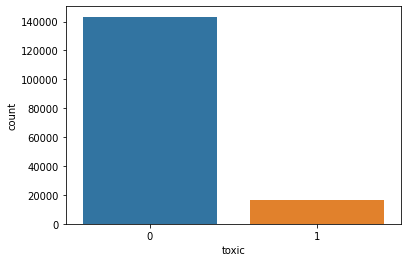

In [7]:
# Посмотрим на разброс целевой колонки
sns.countplot(x = 'toxic', data = data_raw)

### Исследовательский анализ данных¶

(-0.5, 399.5, 199.5, -0.5)

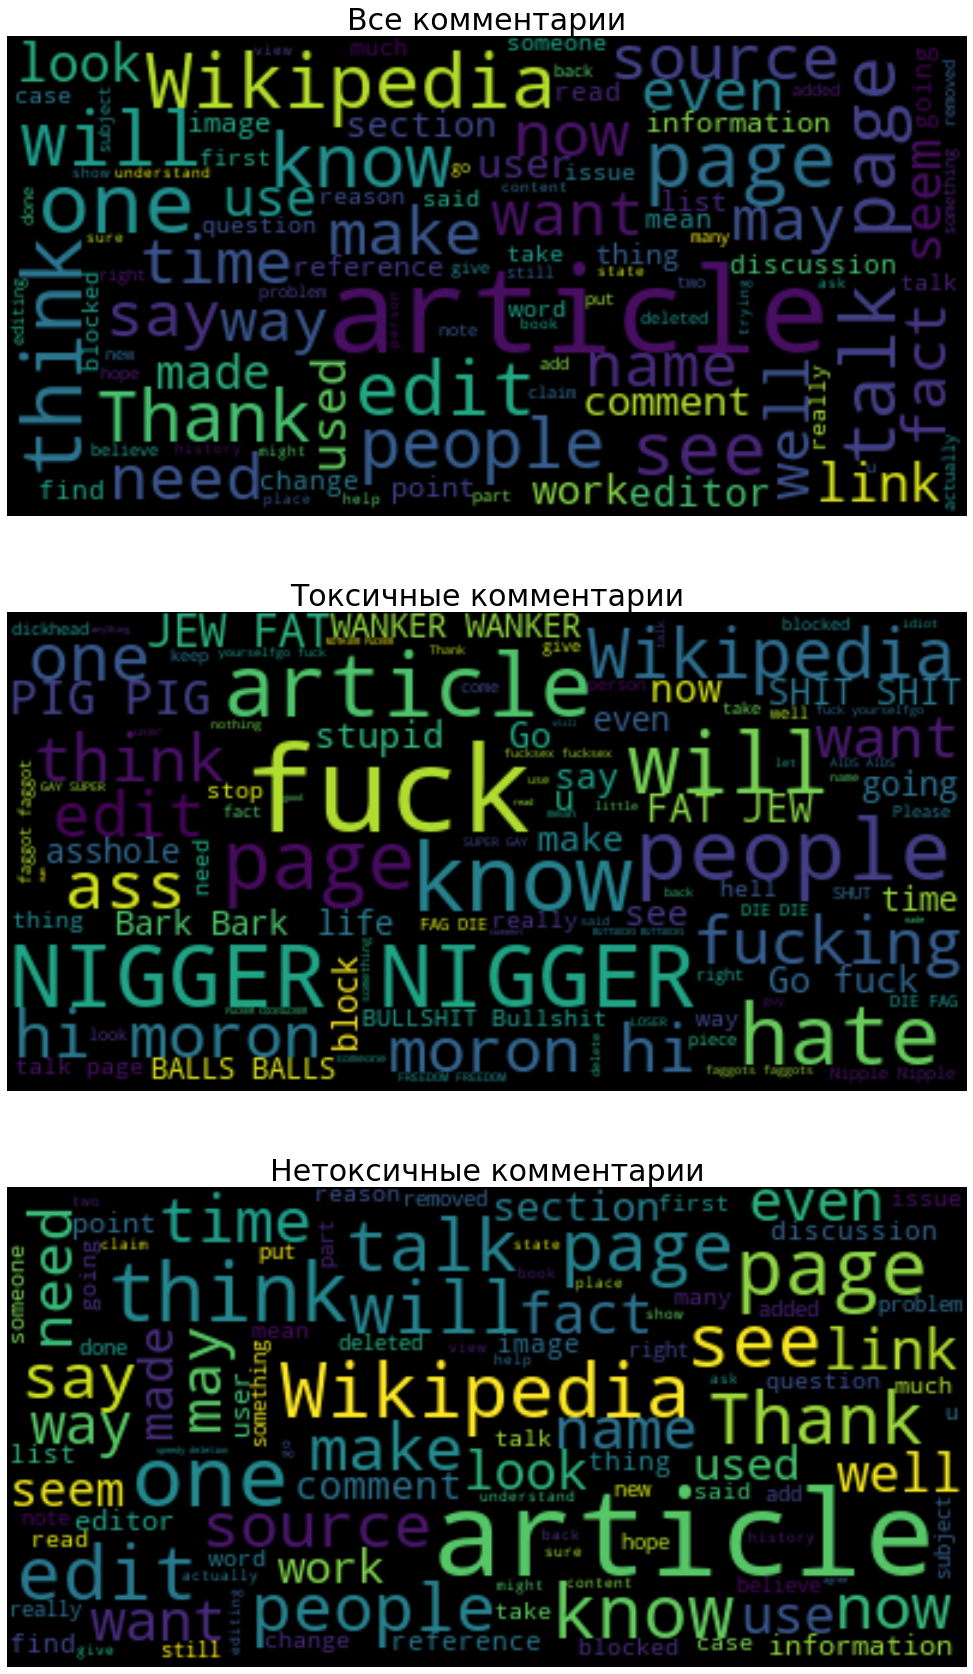

In [8]:
#Визуализация WordCloud

df_toxic = data_raw[data_raw['toxic']==1]
df_nottoxic = data_raw[data_raw['toxic']==0]

All = " ".join(review for review in data_raw.text)
toxic = " ".join(review for review in df_toxic.text)
nottoxic = " ".join(review for review in df_nottoxic.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(All)
wordcloud_toxic = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(toxic)
wordcloud_nottoxic = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(nottoxic)


ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('Все комментарии', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_toxic, interpolation='bilinear')
ax[1].set_title('Токсичные комментарии',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nottoxic, interpolation='bilinear')
ax[2].set_title('Нетоксичные комментарии',fontsize=30)
ax[2].axis('off')

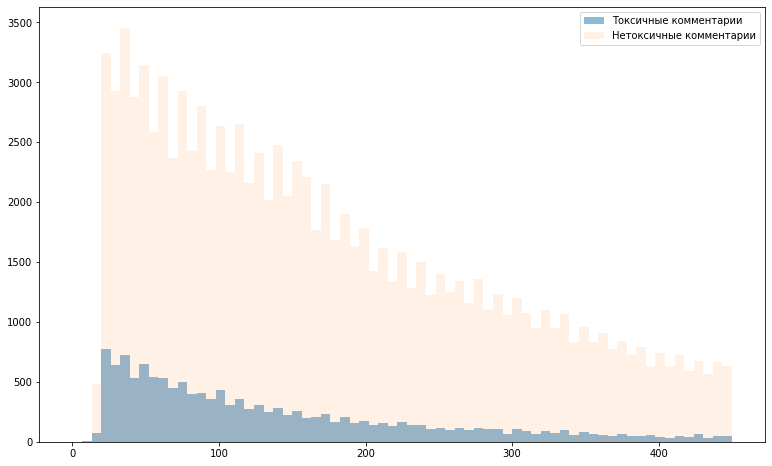

In [9]:
#Посмотрим, какая длина комментария больше
TOXIC_1 = data_raw[data_raw['toxic'] == 1]['text'].apply(lambda x: len(x) - len(' '))
TOXIC_0 = data_raw[data_raw['toxic'] == 0]['text'].apply(lambda x: len(x) - len(' '))
bins_ = np.linspace(0, 450, 70)
plt.figure(figsize=(13,8))
plt.hist(TOXIC_1, bins= bins_, alpha = 0.5, label = 'Токсичные комментарии')
plt.hist(TOXIC_0, bins= bins_, alpha = 0.1, label = 'Нетоксичные комментарии')
plt.legend()

### Предобработка данных

Очистка данных:
- Удалить знаки пунктуации
- Токенизация 
- Удаление стов-слов
- Лемматизация и стемминг

#### Удалить знаки пунктуации и копирование датасета

In [10]:
data = data_raw
if not sys.warnoptions:
    warnings.simplefilter("ignore")


def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

data['punct'] = data['text'].apply(lambda x: remove_punct(x))
data.head(3)

,text,toxic,punct
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted They were...
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,Daww He matches this background colour Im seemingly stuck with Thanks talk January UTC
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant ...


#### Токенизация

In [11]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['tokenized'] = data['punct'].apply(lambda x: tokenization(x.lower()))
data.head(3)

,text,toxic,punct,tokenized
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted They were...,"[explanation, why, the, edits, made, under, my, username, hardcore, metallica, fan, were, revert..."
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,Daww He matches this background colour Im seemingly stuck with Thanks talk January UTC,"[daww, he, matches, this, background, colour, im, seemingly, stuck, with, thanks, talk, january,..."
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant ...,"[hey, man, im, really, not, trying, to, edit, war, its, just, that, this, guy, is, constantly, r..."


#### Удаление стов-слов

In [12]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['nonstop'] = data['tokenized'].apply(lambda x: remove_stopwords(x))
data.head(3)

,text,toxic,punct,tokenized,nonstop
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted They were...,"[explanation, why, the, edits, made, under, my, username, hardcore, metallica, fan, were, revert...","[explanation, edits, made, username, hardcore, metallica, fan, reverted, werent, vandalisms, clo..."
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,Daww He matches this background colour Im seemingly stuck with Thanks talk January UTC,"[daww, he, matches, this, background, colour, im, seemingly, stuck, with, thanks, talk, january,...","[daww, matches, background, colour, im, seemingly, stuck, thanks, talk, january, utc]"
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant ...,"[hey, man, im, really, not, trying, to, edit, war, its, just, that, this, guy, is, constantly, r...","[hey, man, im, really, trying, edit, war, guy, constantly, removing, relevant, information, talk..."


#### Стемминг

In [ ]:
sys.setrecursionlimit(160000)
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

data['stemmed'] = data['nonstop'].apply(lambda x: stemming(x))
data.head(3)

#### Лемматизация

In [13]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['lemmatized'] = data['nonstop'].apply(lambda x: lemmatizer(x))
data.head(3)

,text,toxic,punct,tokenized,nonstop,lemmatized
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted They were...,"[explanation, why, the, edits, made, under, my, username, hardcore, metallica, fan, were, revert...","[explanation, edits, made, username, hardcore, metallica, fan, reverted, werent, vandalisms, clo...","[explanation, edits, made, username, hardcore, metallica, fan, reverted, werent, vandalism, clos..."
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,Daww He matches this background colour Im seemingly stuck with Thanks talk January UTC,"[daww, he, matches, this, background, colour, im, seemingly, stuck, with, thanks, talk, january,...","[daww, matches, background, colour, im, seemingly, stuck, thanks, talk, january, utc]","[daww, match, background, colour, im, seemingly, stuck, thanks, talk, january, utc]"
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant ...,"[hey, man, im, really, not, trying, to, edit, war, its, just, that, this, guy, is, constantly, r...","[hey, man, im, really, trying, edit, war, guy, constantly, removing, relevant, information, talk...","[hey, man, im, really, trying, edit, war, guy, constantly, removing, relevant, information, talk..."


## Обучение

План работ:
- Разделить данные на train и test (70:30)
- Используя GridSearcCV найти лучшие параметры, которые дадут лучший результат

In [14]:
#Разделение данных на train и test
train, test = train_test_split(data, test_size=.30, random_state=123)

In [15]:
#Вызов TFIDF
count_tf_idf = TfidfVectorizer()

In [24]:
models = {
    'LogisticRegression': LogisticRegression(),
    'LGBMClassifier': lgb.LGBMClassifier()
}


params = {
    'LogisticRegression':{
        'class_weight':['balanced', None],
        'C':[1,10,100]
    },        

    'LGBMClassifier': {
        'boosting_type':['gbdt'],
        'objective':['binary'],
        'learning_rate':[0.02,0.05],
        'num_iterations':[500],
        'num_leaves':[50,75],
        'feature_fraction':[0.64,0.8],
        'bagging_fraction':[0.8,0.9],
        'bagging_freq':[1,2]
        }
}

In [16]:
models = {
    'LogisticRegression': LogisticRegression()
}


params = {
    'LogisticRegression':{
        'class_weight':['balanced', None],
        'C':[1,10,100]
    }
}

In [17]:
%%time
result_list = []
features = ['lemmatized']

for feature in features:
    X_train = train[feature]
    y_train = train['toxic']
    X_test = test[feature]
    y_test = test['toxic']

    train_corpus = X_train.astype('U')
    tfidf = count_tf_idf.fit_transform(train_corpus) 
    corpus_test = X_test.astype('U')
    tfidf_test = count_tf_idf.transform(corpus_test)

    fit(tfidf, y_train)

Wall time: 3min 8s


In [25]:
%%time
result_list = []
features = ['lemmatized','text','punct','tokenized','nonstop']

for feature in features:
    X_train = train[feature]
    y_train = train['toxic']
    X_test = test[feature]
    y_test = test['toxic']

    train_corpus = X_train.astype('U')
    tfidf = count_tf_idf.fit_transform(train_corpus) 
    corpus_test = X_test.astype('U')
    tfidf_test = count_tf_idf.transform(corpus_test)

    fit(tfidf, y_train)

[LightGBM] [Warning] feature_fraction is set=0.64, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=

In [26]:
results = pd.DataFrame(result_list, columns=['model','feature','f1_score','best_params'])

## Выводы

In [27]:
results.style.highlight_max(color = 'lightgreen', axis = 0)

,model,feature,f1_score,best_params
0,LogisticRegression,lemmatized,0.778430,LogisticRegression(C=10)
1,LGBMClassifier,lemmatized,0.786275,"LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.64, learning_rate=0.05, num_iterations=500, num_leaves=50, objective='binary')"
2,LogisticRegression,text,0.785512,LogisticRegression(C=10)
3,LGBMClassifier,text,0.788266,"LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.05, num_iterations=500, num_leaves=75, objective='binary')"
4,LogisticRegression,punct,0.784765,LogisticRegression(C=10)
5,LGBMClassifier,punct,0.786570,"LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.05, num_iterations=500, num_leaves=75, objective='binary')"
6,LogisticRegression,tokenized,0.784765,LogisticRegression(C=10)
7,LGBMClassifier,tokenized,0.786570,"LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.05, num_iterations=500, num_leaves=75, objective='binary')"
8,LogisticRegression,nonstop,0.776398,LogisticRegression(C=10)
9,LGBMClassifier,nonstop,0.783069,"LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, feature_fraction=0.8, learning_rate=0.05, num_iterations=500, num_leaves=50, objective='binary')"


- Как видно из результатов F1_score - 0.78 у LGBMClassifier на тестовой выборке
- Действительно странно, что именно необработанный текст без какой-либо обработки дает наилучшие результаты.
- Итак, мы построили модель машинного обучения на тестовом образце с F1_score 0,788.